# S09_T01: Practicant amb training i test sets
***Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.***
 

## Nivell1 - 


### Exercici 1
***Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.***

* Year 2008
* Month 1-12
* DayofMonth 1-31
* DayOfWeek 1 (Monday) - 7 (Sunday)
* DepTime actual departure time (local, hhmm)
CRSDepTime scheduled departure time (local, hhmm)
* ArrTime actual arrival time (local, hhmm)
* CRSArrTime scheduled arrival time (local, hhmm)
* UniqueCarrier unique carrier code
* FlightNum flight number
* TailNum plane tail number: aircraft registration, unique aircraft identifier
* ActualElapsedTime in minutes
* CRSElapsedTime in minutes
* AirTime in minutes
* ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
* DepDelay departure delay, in minutes
* Origin origin IATA airport code
* Dest destination IATA airport code
* Distance in miles
* TaxiIn taxi in time, in minutes
* TaxiOut taxi out time in minutes
* Cancelled *was the flight cancelled
* CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
* Diverted 1 = yes, 0 = no
* CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
* WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
* NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
* SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
* LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


* CONSIDERACIONS
El primer que fare es definir el problema, com que al al T02 d'aquest mateix modul el que es demana es sfer una preddicció del retard dels vols , aleshores encaminaré els passos per establir conjunt de dades destinadades a fer la predicció del retar.
 - Primer revisaré dades i eliminaré els atributs que puguin no ser rellevants pel objectiu que tenim
 - Transforaré els atributs per descomposdar-los i tenir.los en el tipus de dades correcte
 - Posteriorment identificaré les dades categoriques per transformar-los a partrir del get_dummy , etc
 - Finalment resumire les noves columnes generades
 
 *** He agafat com a guia l'exercici que he trobat i que establia que per fer estimacions dels retards.En aquest pendrem com a variable objectiu el retard  total***
 * ArrDelay + DepDelay 
 
 *** i les seguents variables es descartaran ja que no es conèixen a ll'hora de fer la previsió***
 
  * DepTime actual departure time (local, hhmm)
  * ArrTime actual arrival time (local, hhmm)
  * ActualElapsedTime in minutes

*** La variable  AirTime la podriem considerar con el temps de vol estimat , es possible que tingui una influència al retard
 


In [34]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=None
pd.options.display.max_rows=30

In [35]:
delayedFlightsDf=pd.read_csv('DelayedFlights.csv',index_col=0,sep=',', encoding='utf8')
delayedFlightsDBck=delayedFlightsDf.copy()

In [36]:
delayedFlightsDf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

* Transformo CSRDeptime i CSRArrtime , DepTime i ArrTime al horas i minuts

In [39]:
def descomposaTime(df,cols):
    for i,col in enumerate(cols):
        time = df[cols[i][0]]
        #horas , minutos= divmod(time, 60)
        df[cols[i][1]]=time.apply(lambda x: x//100)
        df[cols[i][2]]=time.apply(lambda x: x%100)
    return df



In [40]:
# Converteixo csr Dep time i ArrTime , en dos atributs cadascun , hore si minuts
cols=[['CRSDepTime','CRSDepHour','CRSDepMin'],['CRSArrTime','CRSArrHour','CRSArrpMin']]
# Sumaritzem els retards de sortida i arribada que seràn el target
delayedFlightsDf["totDelay"]=delayedFlightsDf["ArrDelay"]+delayedFlightsDf["DepDelay"]
descomposaTime(delayedFlightsDf,cols)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totDelay,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,-6.0,19,55,22,25
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,21.0,7,35,10,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,22.0,6,20,7,50
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,68.0,17,55,19,25
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,36.0,19,15,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,55.0,12,20,15,52
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,132.0,6,0,7,49
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,179.0,8,47,10,10
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,20.0,12,40,14,37


In [41]:
#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
delayedFlightsDf.isna().sum()[delayedFlightsDf.isna().sum() != 0]

ArrTime                7110
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
TaxiIn                 7110
TaxiOut                 455
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
totDelay               8387
dtype: int64

* Tant ArrDelay i AirTime haurien de tenir valor perque en un cas el atribut objectiu que tenim i en l'altre cas si no hi ha air time no te sentit calcular el delay ja que no s'ha produit


In [42]:
#Necessitem sempre dades en la variable objectiu. Eliminarem les instàncies que no tinguin aquesta informació.  

index = delayedFlightsDf['ArrDelay'][delayedFlightsDf['ArrDelay'].isna()].index
delayedFlightsDf.drop(index=index, inplace=True)

index = delayedFlightsDf['AirTime'][delayedFlightsDf['AirTime'].isna()].index
delayedFlightsDf.drop(index=index, inplace=True)


In [43]:

#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
delayedFlightsDf.isna().sum()[delayedFlightsDf.isna().sum() != 0]

TailNum                   3
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [44]:
#busquem les variables amb un valor únic, o el que és el mateix, amb variança 0. Com no ens aporten cap informació pel 
#pronòstic de la sortida, les podem eliminar.
valorsUnicsCols = delayedFlightsDf.apply(lambda var: len(var.unique()))
print(delayedFlightsDf[valorsUnicsCols[valorsUnicsCols == 1].index].value_counts())

Year  Cancelled  CancellationCode  Diverted
2008  0          N                 0           1928371
dtype: int64


***Eliminem les columnes de les que no estem interessats perqyue no formem part dels atributs predictors i***
***i també les columnes catgóriques amb valors unics i les convertides a data hora***

In [45]:
# Eliminem les columnes que no necesitem perque  es informació que no tindrem
dropcol=['Year','Cancelled','CancellationCode','Diverted','Year','CRSDepTime','CRSArrTime', 'CancellationCode','Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay','TaxiIn', 'TaxiOut','ArrDelay','DepDelay','DepTime','ArrTime','ActualElapsedTime']
delayedFlightsDf.drop(columns=dropcol, inplace=True)

In [46]:
#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
delayedFlightsDf.isna().sum()[delayedFlightsDf.isna().sum() != 0]

TailNum    3
dtype: int64

***Revisen ara les columne Tailnum***

In [47]:
# Hi ha molts valors diferents 
valorsUnicsCols.iloc[valorsUnicsCols.index.get_loc("TailNum")]

5361

* El  tail number refers to an identification number painted on an aircraft, frequently on the tail.

 No es exactament un matricula però això voldria dir que un determinal avió te retrads pel simple fet de ser el avió concret. En aquest cas s'ahuria d'estudiar especificament , en el nostre cas asumim que no es rellevant perque a mes a mes fer un get_dummies d'aquest camp agregaría moltes columnes i el dataframe probablement seria intractable
 

In [48]:
dropcol=['TailNum']
delayedFlightsDf.drop(columns=dropcol, inplace=True)

In [49]:
delayedFlightsDf

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,CRSElapsedTime,AirTime,Origin,Dest,Distance,totDelay,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin
0,1,3,4,WN,335,150.0,116.0,IAD,TPA,810,-6.0,19,55,22,25
1,1,3,4,WN,3231,145.0,113.0,IAD,TPA,810,21.0,7,35,10,0
2,1,3,4,WN,448,90.0,76.0,IND,BWI,515,22.0,6,20,7,50
4,1,3,4,WN,3920,90.0,77.0,IND,BWI,515,68.0,17,55,19,25
5,1,3,4,WN,378,115.0,87.0,IND,JAX,688,36.0,19,15,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,DL,1621,152.0,120.0,MSP,ATL,906,55.0,12,20,15,52
7009717,12,13,6,DL,1631,109.0,78.0,RIC,ATL,481,132.0,6,0,7,49
7009718,12,13,6,DL,1631,143.0,122.0,ATL,IAH,689,179.0,8,47,10,10
7009726,12,13,6,DL,1639,117.0,89.0,IAD,ATL,533,20.0,12,40,14,37


In [50]:

import math
#from scipy.stats import shapiro
#from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import category_encoders

In [51]:
# split imbalanced dataset into train and test sets without stratification
from sklearn.model_selection import train_test_split


In [52]:
# Establim el set de predictors i els sets de targets

y = delayedFlightsDf['totDelay']
X = delayedFlightsDf.drop(columns='totDelay')

#Com el nostre conjunt de dades es molt gran podem fer un train del 65% i un test del 35%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=9)


# verifiquem conjunts resultatnts

perTrain = round(100 * len(X_train) / (len(X)))
perTest  = round(100 * len(X_test) / (len(X)))
                 
print("Set de Train: Tamany:  {0}--{1}%".format(len(X_train),perTrain))
print("Set de Test : Tamany:  {0}--{1}%".format(len(X_test),perTest))   


Set de Train: Tamany:  1253441--65%
Set de Test : Tamany:  674930--35%


In [53]:
descTrain=X_train.describe()
descTest=X_test.describe()

In [54]:
resul=descTrain-descTest
descTrain


,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin
count,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06,1.253441e+06
mean,6.108689e+00,1.574680e+01,3.985231e+00,2.183268e+03,1.342415e+02,1.083158e+02,7.652141e+02,1.440224e+01,2.761502e+01,1.605510e+01,2.894617e+01
std,3.480997e+00,8.774604e+00,1.996286e+00,1.945427e+03,7.131049e+01,6.870614e+01,5.743018e+02,4.242533e+00,1.775015e+01,4.642191e+00,1.757682e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.100000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,6.090000e+02,8.200000e+01,5.800000e+01,3.380000e+02,1.100000e+01,1.200000e+01,1.300000e+01,1.500000e+01
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.541000e+03,1.160000e+02,9.000000e+01,6.060000e+02,1.500000e+01,3.000000e+01,1.700000e+01,3.000000e+01
75%,9.000000e+00,2.300000e+01,6.000000e+00,3.423000e+03,1.650000e+02,1.370000e+02,9.980000e+02,1.800000e+01,4.500000e+01,2.000000e+01,4.500000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,9.741000e+03,6.600000e+02,7.330000e+02,4.962000e+03,2.300000e+01,5.900000e+01,2.300000e+01,5.900000e+01


In [55]:
descTest

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin
count,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000,674930.000000
mean,6.106306,15.761833,3.984567,2186.205406,134.116328,108.205455,764.455434,14.398964,27.594980,16.047718,28.941985
std,3.480302,8.780209,1.995614,1942.633503,71.089965,68.524455,573.112452,4.246832,17.767287,4.652340,17.573492
min,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,613.000000,81.000000,58.000000,338.000000,11.000000,11.000000,13.000000,15.000000
50%,6.000000,16.000000,4.000000,1546.000000,116.000000,90.000000,606.000000,15.000000,30.000000,17.000000,30.000000
75%,9.000000,23.000000,6.000000,3422.000000,165.000000,137.000000,997.000000,18.000000,45.000000,20.000000,45.000000
max,12.000000,31.000000,7.000000,9740.000000,660.000000,1091.000000,4962.000000,23.000000,59.000000,23.000000,59.000000


In [56]:
resul

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin
count,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000,578511.000000
mean,0.002383,-0.015030,0.000664,-2.937408,0.125148,0.110295,0.758711,0.003278,0.020041,0.007381,0.004181
std,0.000695,-0.005605,0.000671,2.793148,0.220521,0.181689,1.189339,-0.004299,-0.017135,-0.010149,0.003324
min,0.000000,0.000000,0.000000,0.000000,-36.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,1.000000,0.000000,-358.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
#Funcio per mostrar boxplot de una variable numerica a cada df , inicial trai i test
def comp3Sets(df,trainDf,testDf,col):
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,1*4))
           
    plt.subplot(1, 3, 1)
    sns.boxplot(y=df[col], data=df, linewidth=1 , width=.5)
    plt.ylim(df[col].quantile(q=.5),df[col].quantile(q=.95))
    plt.title(col)
    plt.ylabel("")

    plt.subplot(1, 3, 2)
    sns.boxplot(y=X_train[col], data=X_train, linewidth=1 , width=.5)
    plt.ylim(X_train[col].quantile(q=.5),X_train[col].quantile(q=.95))
    plt.title(col)
    plt.ylabel("")

    plt.subplot(1, 3, 3)
    sns.boxplot(y=X_test[col], data=X_test, linewidth=1 , width=.5)
    plt.ylim(X_test[col].quantile(q=.5),X_test[col].quantile(q=.95))
    plt.title(col)
    plt.ylabel("")
    return

In [59]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'CRSElapsedTime', 'AirTime', 'Origin', 'Dest', 'Distance', 'CRSDepHour',
       'CRSDepMin', 'CRSArrHour', 'CRSArrpMin'],
      dtype='object')

***Comparem les variables númeriques tant del dataset original como el training i test per tal de tenen una distribucií similar , es a dir que no estan esbiaxades***

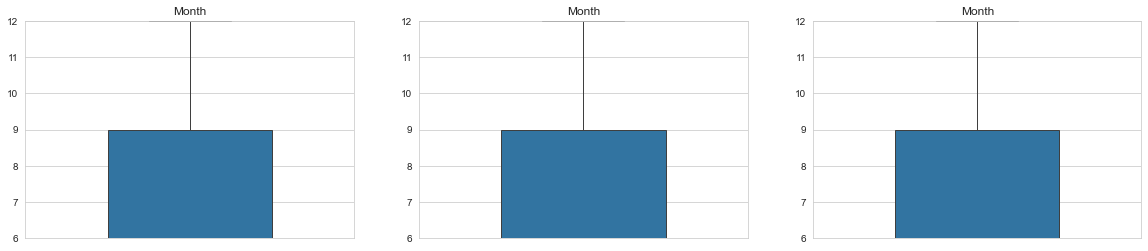

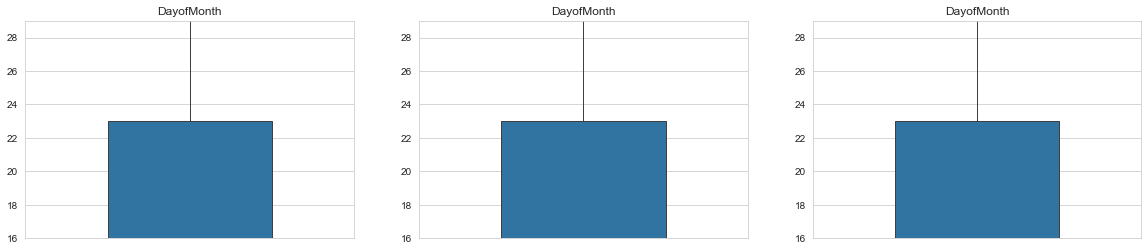

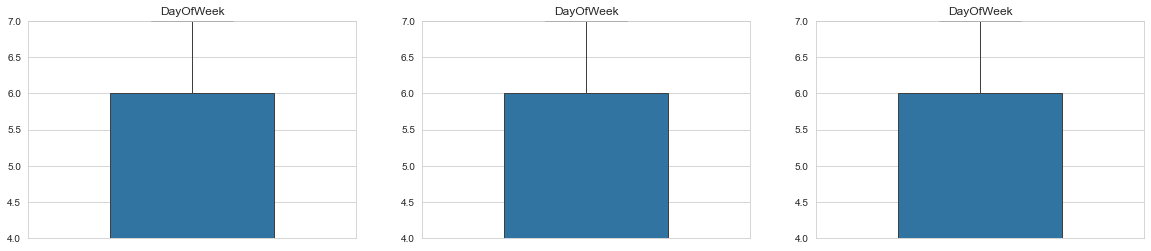

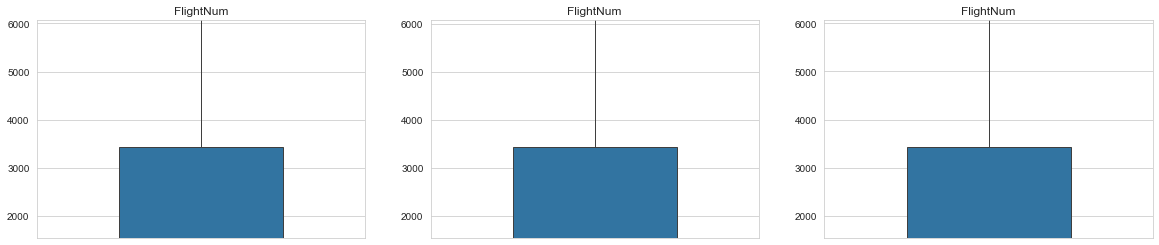

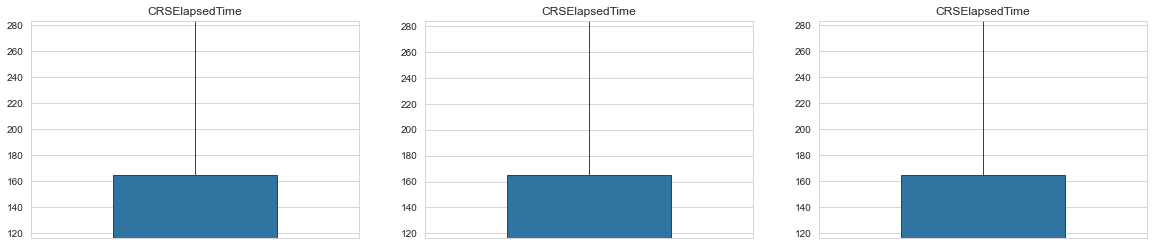

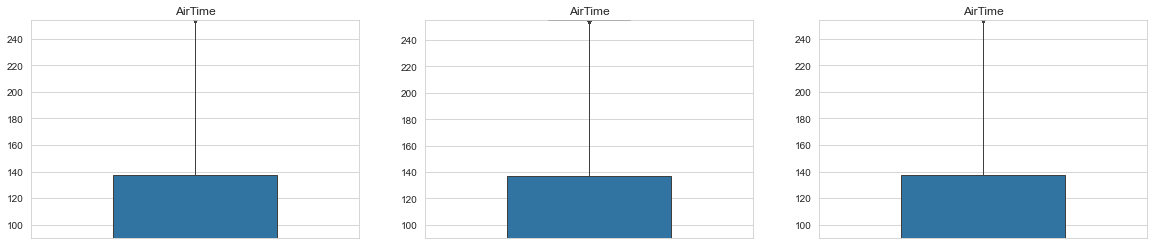

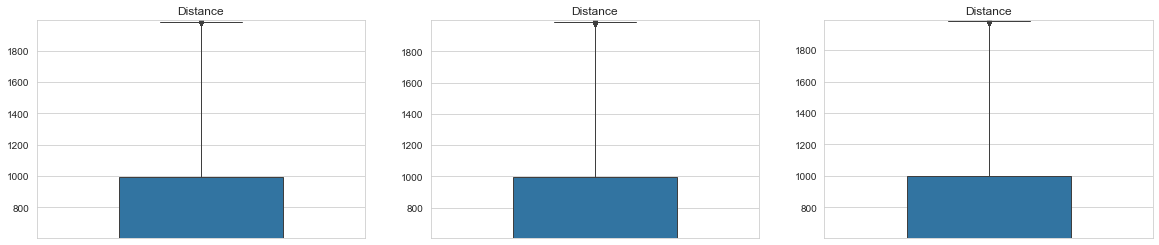

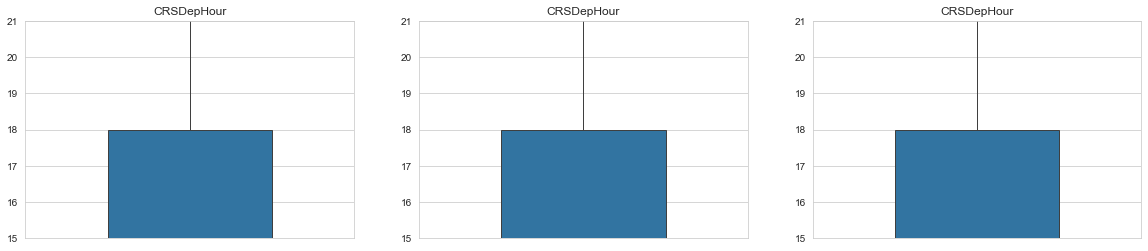

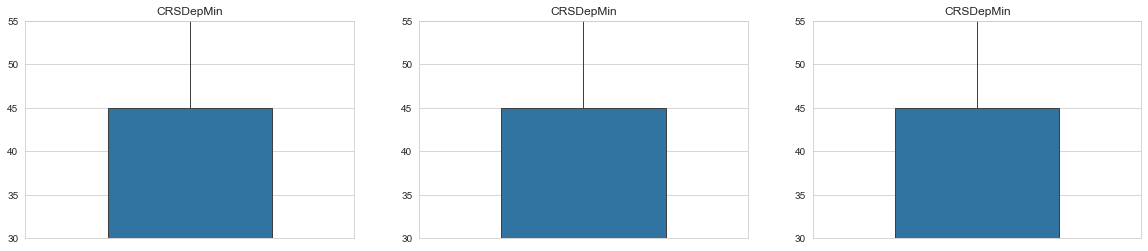

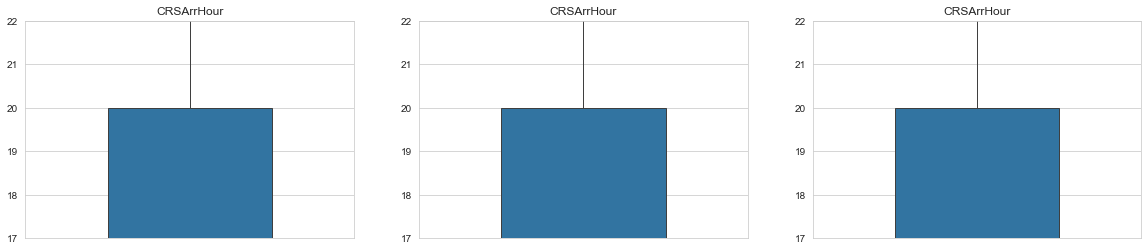

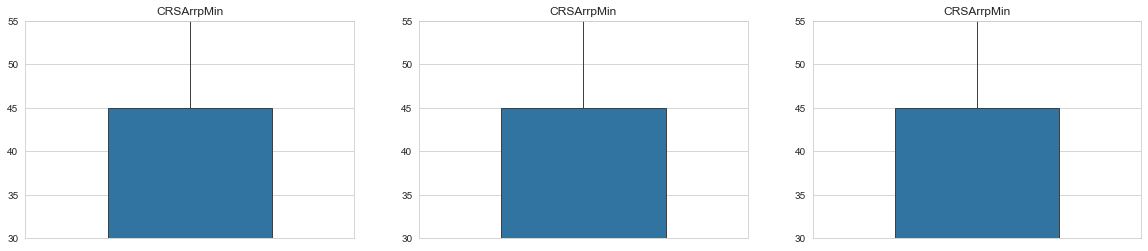

In [60]:

colsNum=['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum','CRSElapsedTime', 'AirTime',  'Distance', 'CRSDepHour','CRSDepMin', 'CRSArrHour', 'CRSArrpMin']
for col in colsNum:
    comp3Sets(delayedFlightsDf,X_train,X_test,col)
    
    
    

***Revisem el sets de la variable target***


In [61]:
type(y_train)

pandas.core.series.Series

In [62]:
train_desc=pd.DataFrame(y_train).describe().applymap('{:,.5f}'.format)
test_desc=pd.DataFrame(y_test).describe().applymap('{:,.5f}'.format)
main_desc=pd.DataFrame(y).describe().applymap('{:,.5f}'.format)


In [63]:
pd.concat([train_desc,test_desc,main_desc],axis=1)

,totDelay,totDelay,totDelay
count,"1,253,441.00000","674,930.00000","1,928,371.00000"
mean,85.35355,85.17649,85.29158
std,108.82574,108.60698,108.74923
min,-90.00000,-62.00000,-90.00000
25%,22.00000,22.00000,22.00000
50%,49.00000,48.00000,49.00000
75%,108.00000,108.00000,108.00000
max,"4,920.00000","3,417.00000","4,920.00000"


***Veiem que les dades estadístiques dels 3 sets son uniformes***

## Nivell2 - 


### Exercici 2
***Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)*** 

* Primer tractarem les variables categoriques que ens quedem per fer ytransformació dummy o binaria segons el cas

***UniqueCarrier - Fem servir la tarsnformació get_dumies***


In [64]:
len(X['UniqueCarrier'].unique().tolist())

20

In [65]:
#Fiunció per convertir a dummies
def transDummy(df,col):

    dummyDf = pd.get_dummies(df[col], drop_first=True, prefix="UC", prefix_sep="")
    transDf = pd.concat([df,dummyDf],axis=1)
    dropcol=[col]
    transDf.drop(columns=dropcol, inplace=True)
    return transDf

In [66]:
#Afegim les columnes generades per la codificació de UniqueCarrier
X_trainConv=transDummy(X_train,'UniqueCarrier')
X_testConv=transDummy(X_test,'UniqueCarrier')

In [67]:
X_trainConv

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Origin,Dest,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin,UCAA,UCAQ,UCAS,UCB6,UCCO,UCDL,UCEV,UCF9,UCFL,UCHA,UCMQ,UCNW,UCOH,UCOO,UCUA,UCUS,UCWN,UCXE,UCYV
5196238,9,18,4,3605,105.0,84.0,DFW,PNS,604,14,20,16,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
328847,1,19,6,4339,154.0,146.0,SWF,ATL,784,17,10,19,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6637991,12,25,4,5751,90.0,69.0,SFO,LMT,315,10,24,11,54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6378655,11,7,5,1283,195.0,153.0,MIA,ORD,1197,19,25,21,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
520761,1,30,3,1939,205.0,174.0,BOS,MIA,1258,18,25,21,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370577,4,2,3,1174,88.0,62.0,ATL,CVG,373,17,20,18,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1439481,3,2,7,1881,117.0,89.0,ORD,CLT,599,18,0,20,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6541724,12,27,6,87,70.0,52.0,LAX,SJC,308,14,35,15,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2967234,5,7,3,310,220.0,182.0,IAH,EWR,1400,19,0,23,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
X_testConv

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Origin,Dest,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin,UCAA,UCAQ,UCAS,UCB6,UCCO,UCDL,UCEV,UCF9,UCFL,UCHA,UCMQ,UCNW,UCOH,UCOO,UCUA,UCUS,UCWN,UCXE,UCYV
301557,1,2,3,141,70.0,60.0,STL,OMA,342,19,55,21,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1938664,4,28,1,2696,84.0,59.0,SDF,CLT,336,20,5,21,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1308814,3,2,7,7180,76.0,55.0,DEN,MTJ,197,10,2,11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
536611,1,8,2,82,129.0,107.0,SEA,SFO,679,15,46,17,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3185844,6,13,5,6227,150.0,123.0,SBA,DEN,916,10,51,14,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933086,2,7,4,559,138.0,124.0,DEN,SAN,853,14,55,16,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2465215,5,26,1,3511,75.0,59.0,LAX,SFO,337,9,5,10,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3411698,6,20,5,4456,70.0,50.0,RST,ORD,268,15,45,16,55,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
950710,2,18,1,900,106.0,97.0,PHF,ATL,508,14,35,16,21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


* ***Origin/Dest , aplicarem una transformació  binaria ja que hi ha moltes dades úniques***

***Com veuren els valors unics son molt alts , ens plantegem fer una transformacio polinómica per reduir el nombre de columnes***

***La fórmula es***

\begin{align*} \frac{\log(n + 1)}{\log(2)}\end{align*}

In [69]:
len(X['Origin'].unique().tolist())

303

In [70]:
len(X['Dest'].unique().tolist())

302

In [71]:
numcols=(math.log(303+1)/math.log(2))

In [72]:
print("Per codificar una variable categorica de 303 valors necesitem : {0}".format(int(numcols)+1))

Per codificar una variable categorica de 303 valors necesitem : 9


In [73]:
from category_encoders import BinaryEncoder

In [74]:

def codificacioBin(df,col):
    # Creamos el codificador indicandole la columna
    encoder = BinaryEncoder(cols=[col])
    # Ajustamos el codificador con native-country y la transformamos
    encoder.fit(df[col])
    codBinDf = encoder.transform(df[col])
    codBinDf = pd.concat([df,codBinDf],axis=1)
    dropcol=[col]
    codBinDf.drop(columns=dropcol, inplace=True)
    return codBinDf

In [75]:
X_trainConv=codificacioBin(X_trainConv,'Origin')
X_trainConv=codificacioBin(X_trainConv,'Dest')

X_testConv=codificacioBin(X_testConv,'Origin')
X_testConv=codificacioBin(X_testConv,'Dest')

In [76]:
X_trainConv

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin,UCAA,UCAQ,UCAS,UCB6,UCCO,UCDL,UCEV,UCF9,UCFL,UCHA,UCMQ,UCNW,UCOH,UCOO,UCUA,UCUS,UCWN,UCXE,UCYV,Origin_0,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5,Origin_6,Origin_7,Origin_8,Dest_0,Dest_1,Dest_2,Dest_3,Dest_4,Dest_5,Dest_6,Dest_7,Dest_8
5196238,9,18,4,3605,105.0,84.0,604,14,20,16,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
328847,1,19,6,4339,154.0,146.0,784,17,10,19,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6637991,12,25,4,5751,90.0,69.0,315,10,24,11,54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
6378655,11,7,5,1283,195.0,153.0,1197,19,25,21,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
520761,1,30,3,1939,205.0,174.0,1258,18,25,21,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370577,4,2,3,1174,88.0,62.0,373,17,20,18,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1439481,3,2,7,1881,117.0,89.0,599,18,0,20,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1
6541724,12,27,6,87,70.0,52.0,308,14,35,15,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,1
2967234,5,7,3,310,220.0,182.0,1400,19,0,23,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0


In [77]:
standardscaler = preprocessing.StandardScaler()
index = X_trainConv.index
X_trainConv = pd.DataFrame(standardscaler.fit_transform(X_trainConv), columns=X_trainConv.columns, index=index)

In [78]:
#finalment apliquem la transformació lineal d'estandarització a totes les dades
standardscaler = preprocessing.StandardScaler()

index = X_testConv.index
X_testConv = pd.DataFrame(standardscaler.fit_transform(X_testConv), columns=X_testConv.columns, index=index)


In [79]:
X_testConv

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrpMin,UCAA,UCAQ,UCAS,UCB6,UCCO,UCDL,UCEV,UCF9,UCFL,UCHA,UCMQ,UCNW,UCOH,UCOO,UCUA,UCUS,UCWN,UCXE,UCYV,Origin_0,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5,Origin_6,Origin_7,Origin_8,Dest_0,Dest_1,Dest_2,Dest_3,Dest_4,Dest_5,Dest_6,Dest_7,Dest_8
301557,-1.467203,-1.567371,-0.493366,-1.052801,-0.901905,-0.703479,-0.737125,1.083405,1.542444,1.064472,-1.362393,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,2.026677,-0.238998,-0.189035,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,-0.881421,-1.019366,0.843862,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,-1.057562,-0.829700,1.014071
1938664,-0.605208,1.393837,-1.495564,0.262425,-0.704971,-0.718072,-0.747595,1.318875,-1.271719,1.064472,0.003301,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,-0.493419,-0.238998,5.290025,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,-0.881421,0.981002,-1.185028,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,-1.057562,1.205256,-0.986124
1308814,-0.892540,-1.567371,1.511031,2.570633,-0.817505,-0.776445,-0.990130,-1.035823,-1.440569,-1.084986,-0.622642,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,-0.493419,-0.238998,5.290025,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,-0.881421,0.981002,0.843862,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,-1.057562,1.205256,1.014071
536611,-1.467203,-0.884015,-0.994465,-1.083172,-0.071970,-0.017592,-0.149108,0.141526,1.035894,0.204689,1.482803,-0.331489,-0.020226,6.984861,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,-0.493419,-0.238998,-0.189035,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,1.134532,-1.019366,-1.185028,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,0.945571,-0.829700,-0.986124
3185844,-0.030545,-0.314552,0.508832,2.080062,0.223431,0.215902,0.264424,-1.035823,1.317311,-0.440148,-0.451930,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,3.691208,-0.28076,-0.230699,-0.493419,-0.238998,-0.189035,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,1.134532,-1.019366,0.843862,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,0.945571,-0.829700,1.014071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933086,-1.179872,-0.997908,0.007733,-0.837629,0.054630,0.230495,0.154498,-0.093944,1.542444,-0.010257,-0.907162,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,8.200224,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,-0.493419,-0.238998,-0.189035,-0.054912,-0.258156,-0.472211,-0.623868,-0.908946,-1.021162,-0.881421,0.981002,0.843862,-0.06233,-0.310528,-0.503743,1.003399,1.035631,-0.819974,-1.057562,1.205256,-0.986124
2465215,-0.317877,1.166051,-1.495564,0.681959,-0.831571,-0.718072,-0.745850,-1.271293,-1.271719,-1.299931,-0.508834,-0.331489,-0.020226,-0.143167,-0.170821,-0.232337,-0.249964,-0.210372,-0.121948,-0.195543,-0.062629,-0.281117,-0.20594,-0.168171,-0.270914,-0.28076,-0.230699,2.026677,-0.238998,-0.189035,-0.054912,-0.258156,-0.472211,-0.623868,1.100175,0.979276,-0.881421,0.981002,0.843862,-0.06233,-0.310528,-0.503743,-0.996613,-0.965595,-0.819974,0.945571,-0.829700,-0.986124
3411698,-0.030545,0.482696,0.508832,1.168412,-0.901905,-0.849412,-0.866245,0.141526,0.979611,-0.010257,1.482803,-0.331

* ***RESUM***

* Hem importat i tractat el dataset de vols retardats
* Hem fet algunes transformacions inicials ( tipuus de dades , separacio columna datetime)
* Hem fet algunes suposcions
* - Nomes farem servir les dades que sabem amb anteioritat al vol
* - Hem descartat la variable tailNum ja que es categórica amb moltes repeticions ( semblant a matricula) 
* - Com a variable target fem servir la suma de retards ( sortida + arribada)
* Hem realitzat el split de train,test 60% 40%
* Hem transformat Uniquecarrier amb get_dummies 
* Hem transformat Origin & Dest amab transformació binaria, per això hem hagut d'instalar category_encodersç
* Hem analitzat els sets resultants

* Si tinc temps despres de fer el T02 d'aquest modul tornaré al exercici per fer transformació polinòmica de les columnes numeriques



***Nota: La transformació polinòmica la intentaré fer mes endevant ja que de moment passo al T02 del modul 9***
***Així mateix el nivell 3 també l'intentaré fer mes endevant***

## Nivell3 - 

### Exercici 3
***Resumeix les noves columnes generades de manera estadística i gràfica***